# Convolution Neural Network

### Importing ilbraries

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.4.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16010482698954893739
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5060693856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10262604472664990813
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## 1 - Data Preprocessing 

### Preprocessing the Training Set

In [36]:
## Transformation, avoid overfitting. will get very high accracy
## This is going to apply some simple transformation/ rotation to the image / rotations/ zoom in and out flips/ 
## image augmentation
## https://keras.io/api/preprocessing/

## Create object 

# Open slides 
# rescale = feature scaling 1part out of 255
# shear range = shear x +- 20%
# zoom range = zoom +- 20%
# horizontal_flip = flip the image randomly 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

## .flow_from_directory basically picks up your image set there
## path to the training set folder
## target_size, is the target size of the result image
## 150 by 150 kinda too large
## 64, 64 is quite good and fast


## class mode is either binary/categorical
## Can go to 

## For macOs people it's data\training_set
training_set = train_datagen.flow_from_directory(
        'data\\training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [37]:
## Scale but not augmented
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'data/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.


## 2 - CNN construction

### Initialising CNN

In [38]:
model = tf.keras.models.Sequential()

### Convolution layer

**Conv3D and Conv2D**  
Conv2D is used for images. Conv3D is usually used for videos where you have a frame for each time span.  

**filters**.  
Filters are the number of feature detectors.  

**kernel_size**.  
kernal is just another name for filter, size means how many row and col your filters going to have, 3 = 3 row by 3 row

**input_shape**.  
shape of data, height,weight, RGB=3, black white = 1

In [39]:
## filters 

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Pooling

MaxPool2D and MaxPooling2D is the same, they just undergoes some update but kept the old name as alias

The dimension of pooling depends on the dimention of your filter, Conv2D then use 

**Pool size** is 2.  
That means 2x2 matrix in 2D.    
**strides** = shifting 2 pixels at a time

In [40]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### 2nd Convolution layer


If there's already 1 convolution layer before that you don't have to do input_shape, it takes the input shape of the 2nd layer.  



In [41]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening into 1D array

In [42]:
model.add(tf.keras.layers.Flatten())

### Connecting to ANN 

In [43]:
## ANN dense
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [44]:
## Ouput Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training CNN

In [45]:
## Compliing

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Why are there no batch size? Cause we already partition it into batches during the data preprocessing phase

In [77]:
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 19s 77ms/step - loss: 0.2377 - accuracy: 0.9019 - val_loss: 0.5086 - val_accuracy: 0.8085
Epoch 2/25
250/250 [==============================] - 19s 76ms/step - loss: 0.2339 - accuracy: 0.9007 - val_loss: 0.5140 - val_accuracy: 0.8155
Epoch 3/25
250/250 [==============================] - 19s 76ms/step - loss: 0.2284 - accuracy: 0.9051 - val_loss: 0.5495 - val_accuracy: 0.8030
Epoch 4/25
250/250 [==============================] - 19s 77ms/step - loss: 0.2124 - accuracy: 0.9076 - val_loss: 0.5274 - val_accuracy: 0.8110
Epoch 5/25
250/250 [==============================] - 19s 77ms/step - loss: 0.2005 - accuracy: 0.9184 - val_loss: 0.5494 - val_accuracy: 0.8170
Epoch 6/25
250/250 [==============================] - 19s 77ms/step - loss: 0.2028 - accuracy: 0.9161 - val_loss: 0.5346 - val_accuracy: 0.8170
Epoch 7/25
250/250 [==============================] - 19s 77ms/step - loss: 0.1976 - accuracy: 0.9186 - val_loss: 0.5950 - val_accuracy:

0.13575004
Dis a cat


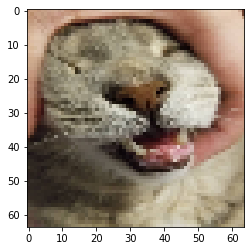

In [84]:
# Making a signle prediction
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

test_image = image.load_img('data//single_prediction//nevilles-nabi-hard.jpg', target_size=(64,64)) ##PIL fortmat

## Covert PIL format to Array
test_image = image.img_to_array(test_image)

plt.imshow(test_image/255.)
## still need to put into batch
## Expand dimentions
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image/255.0)
## what encoding?

print(result[0][0]) 

if result[0][0] <= 0.5:
  print("Dis a cat")
else:
  print("Dis a dog")



In [51]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [52]:
print(result)

[[1.]]


In [82]:
## Saving

model.save('isCat.h5')